<h1 style='font-size:40px'> Flight Prices Estimator</h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            This project is intended to build a flight price estimator using Python's Machine Learning resources.
        </li>
        <li> 
            The dataset includes features such as the Airline company responsible for the flight, the cities of departure and destination and the number of stops projected.
        </li>
        <li> 
            The data used was originally found on <a href='https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction'> Kaggle</a>.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Data Import & Analysis</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Most of the data in our hands is categorical. Hence, we'll need to find out a way to treat these informations so our algorithms can use them.
        </li>
    </ul>
</div>

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('Clean_Dataset.csv', usecols=[i for i in range(1,12)])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<h2 style='font-size:30px'> Searching for NaN's</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Fortunately, all of our columns do not present null values. We do not need to find out a way to treat such kind defect.
        </li>
    </ul>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


<h2 style='font-size:30px'> Correcting the <em> stops</em> column</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            As <em> stops</em> refers to the quantity of stops programmed for the flights, it is reasonable to convert its values to numerical type.
        </li>
    </ul>
</div>

In [5]:
# 'two_or_more' is going to be converted as 2.
df['stops'].replace({'zero':0, 'one':1, 'two_or_more':2}, inplace=True)
df.stops.unique()

array([0, 1, 2])

<h2 style='font-size:30px'> Numerical Values Distribution</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observing the histograms produced, it is visible that one-stop flights compose the majority of the dataset.
        </li>
        <li> 
            The <em> days_left</em> column has a well distributed data.
        </li>
        <li> 
            You can see the number of flights that have two or more stops programmed or a duration above 30 hours is proportionately low; the longest flight record cannot even be seen in the histogram! Maybe removing such cases as exceptions could enhance our models' performance.
        </li>
        <li> 
            From the DataFrame's description, the most expensive price list is above 100,000.00, which is disparate compared with the rest of the flight tickets.
        </li>
    </ul>
</div>

,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,12.221021,26.004751,20889.660523
std,0.398106,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.830000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,49.830000,49.000000,123071.000000


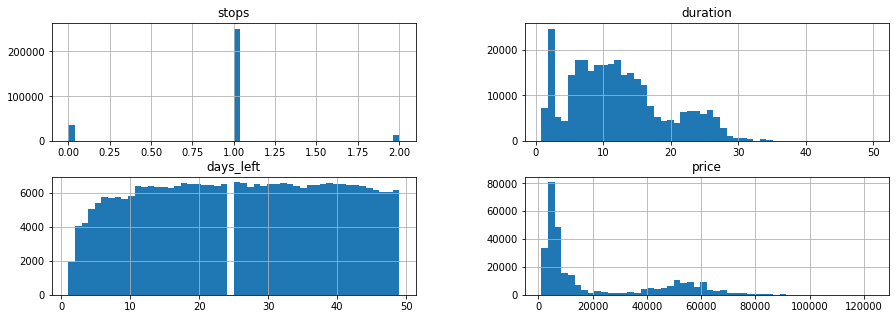

In [6]:
display(df.describe())
df.hist(figsize=(15,5), bins=50);

<h2 style='font-size:30px'> Engendering Train and Test Sets</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            In our sampling, I've chosen to maintain the proportions of the airlines from the dataset.
        </li>
    </ul>
</div>

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=42)

for train_index, test_index in split.split(df, df.airline):
    train = df.loc[train_index]
    test = df.loc[test_index]

<h2 style='font-size:30px'> Exploratory Analysis on the Training Data</h2>

<h3 style='font-size:30px;font-style:italic'> Prices per company</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Companies might charge different prices depending on their target public. Luxury airlines are inclined to have more expensive tickets, for instance.
        </li>
    </ul>
</div>

In [8]:
# By observing the 'groupby' output, Vistara and Air_India have the most expensive flights.
train.groupby('airline')['price'].mean().sort_values(ascending=False)

airline
Vistara      30382.636317
Air_India    23467.830284
SpiceJet      6165.781107
GO_FIRST      5654.717337
Indigo        5313.265451
AirAsia       4088.926075
Name: price, dtype: float64

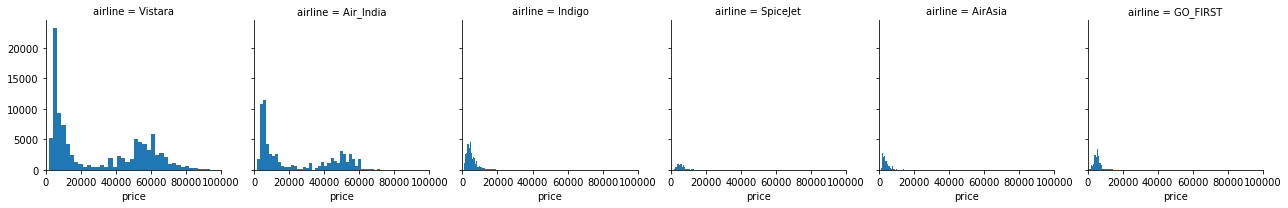

In [9]:
# Vistara and Air India also have a broader variety of prices compared to the other companies.
import seaborn as sns
import matplotlib.pyplot as plt
airline_fg = sns.FacetGrid(data=train, col='airline', xlim=[0, 100000])

airline_fg.map(plt.hist, 'price', bins=50)

<h3 style='font-size:30px;font-style:italic'> Prices per airplane</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Since we've already analyzed the prices for every airline, it would also be convenient to verify whether different aircrafts tend to have higher or lower prices.
        </li>
    </ul>
</div>

In [10]:
# And the answer is yes! Prices vary considerably depending on the airplane used.
train.groupby('flight')['price'].mean().sort_values(ascending=False)

flight
AI-433     44025.000000
UK-820     40602.498191
UK-930     40094.975684
UK-970     39429.818452
UK-996     39143.068898
               ...     
6E-7259     1105.000000
6E-7252     1105.000000
6E-7141     1105.000000
6E-7127     1105.000000
6E-557      1105.000000
Name: price, Length: 1559, dtype: float64

<h3 style='font-size:30px;font-style:italic'> Time impact on flight costs</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Let's turn our attention to the time's influence on ticket prices. If flights are scheduled to a part of the day with low demand, prices tend to be lower, for instance. 
        </li>
    </ul>
</div>

<AxesSubplot:xlabel='arrival_time', ylabel='departure_time'>

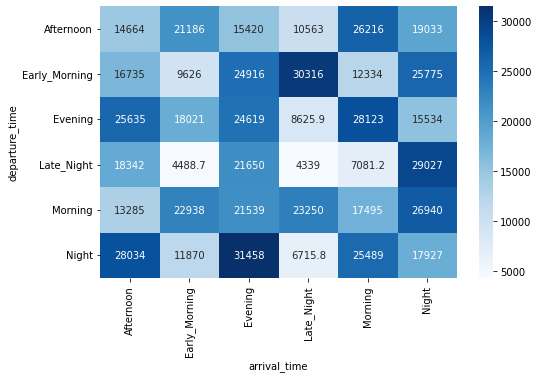

In [11]:
pivot_time = pd.pivot_table(data=train, index='departure_time', columns='arrival_time', values='price')
plt.figure(figsize=(8,5))
sns.heatmap(pivot_time, cmap='Blues', annot=True, fmt='.5g')

<h3 style='font-size:30px;font-style:italic'> Seat type influence on ticket value</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            The status of the location of your seat is an obvious aspect to regard when investigating flight prices. 
        </li>
    </ul>
</div>

<AxesSubplot:xlabel='price', ylabel='Density'>

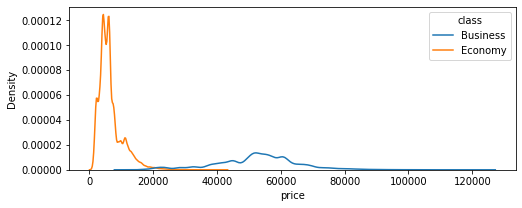

In [12]:
# The economic class tend to have prices close to 10000, whereas the business seats are usually valued between 45000 and 60000.
from seaborn import kdeplot
plt.figure(figsize=(8,3))
kdeplot(data=train, x='price', hue='class')

In [13]:
train[train['class']=='Economy']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
146864,Air_India,AI-773,Kolkata,Evening,1,Early_Morning,Hyderabad,Economy,14.00,39,5456
37061,Air_India,AI-678,Delhi,Morning,1,Morning,Chennai,Economy,25.92,14,8885
29586,Indigo,6E-2147,Delhi,Night,0,Night,Hyderabad,Economy,2.25,9,5955
44053,Vistara,UK-954,Mumbai,Early_Morning,0,Morning,Delhi,Economy,2.08,8,5943
127678,SpiceJet,SG-8264,Kolkata,Night,1,Night,Mumbai,Economy,23.17,3,7958
...,...,...,...,...,...,...,...,...,...,...,...
70855,GO_FIRST,G8-327,Mumbai,Early_Morning,1,Night,Hyderabad,Economy,14.67,6,4262
27409,Air_India,AI-415,Delhi,Evening,1,Afternoon,Kolkata,Economy,19.42,42,4426
176193,GO_FIRST,G8-505,Hyderabad,Afternoon,1,Morning,Kolkata,Economy,20.67,48,5699
60992,Air_India,AI-631,Mumbai,Evening,2,Night,Bangalore,Economy,24.67,46,8186


In [14]:
# Evaluating Cohen's d for measuring the discrepancy between ticket prices for economic and business seats.
def cohensd(group1, group2):
    diff = group1.mean() - group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1*var1 + n2*var2) / (n1+n2)
    d = diff/np.sqrt(pooled_var)
    return d

business = train[train['class']=='Business']['price']
economic = train[train['class']=='Economy']['price']

# The magnitude of the price difference between the Business and Economic classes is roughly 5.83 standard deviations.
cohensd(business, economic)

5.829886289710361

<h3 style='font-size:30px;font-style:italic'> Days lefting and Ticket Prices</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Seeing the seat prices behavior according to the amount of days to the travel.
        </li>
        <li> 
            When there are 15 days remaining, the values start going up. Additionally, a stronger increase usually happens in the last 5 days for the travels.
        </li>
    </ul>
</div>

Text(0.5, 1.0, 'Variation of the Average Prices Per Days Remaining')

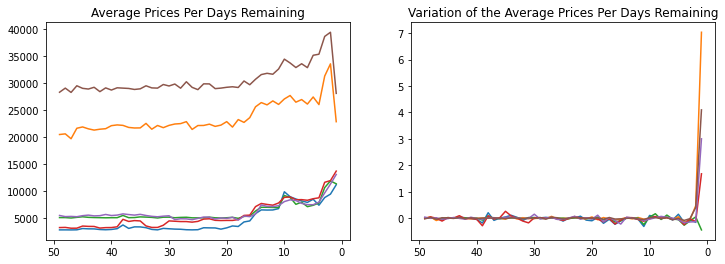

In [15]:
# Getting the average price according to the remaining days for the trip per airline.
days_price = train.groupby(['airline','days_left'])['price'].mean()

# Plotting the average prices.
plt.figure(figsize=(12,4))
fig1 = plt.subplot(121)
for airline in days_price.index.levels[0]:
    plt.plot(days_price.xs(airline, level=0), label=airline)
plt.title('Average Prices Per Days Remaining')
fig1.invert_xaxis()

# Displaying the variation of the average prices.
fig2 = plt.subplot(122)
days_price_derivative = days_price.pct_change()
for airline in days_price_derivative.index.levels[0]:
    plt.plot(days_price_derivative.xs(airline, level=0), label=airline)
fig2.invert_xaxis()
plt.title('Variation of the Average Prices Per Days Remaining')

<h2 style='font-size:30px'> Handling Potential Outliers - Univariate Cases</h2>

<h3 style='font-size:30px;font-style:italic'> Flights with 2 or more stops scheduled</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Recalling the numerical features distribution analysis, travels with 2 or more stops programmed constituted the minority of cases. Considering this, it would be convenient to certify whether that kind of flight is an outlier or not. 
        </li>
        <li> 
            By observing the summary statistics generated, two-stops flights are cheaper than the rest. Thus, having multiple interruptions maybe can be regarded as a factor that turn prices down.
        </li>
    </ul>
</div>

In [16]:
# Separating the sorts of flights under scrutiny.
two_stops = train[train.stops==2]
other_stops = train[train.stops!=2]

# Displaying the results.
print('Two-Stops Flights:')
display(two_stops.describe())

print('Others:')
other_stops.describe()

Two-Stops Flights:


,stops,duration,days_left,price
count,10628.0,10628.000000,10628.000000,10628.000000
mean,2.0,15.326316,24.783873,14184.088634
std,0.0,7.386267,13.724084,17761.121043
min,2.0,3.920000,1.000000,1966.000000
25%,2.0,10.000000,13.000000,6432.000000
50%,2.0,12.710000,24.000000,8321.000000
75%,2.0,19.000000,37.000000,13474.000000
max,2.0,45.830000,49.000000,116562.000000


Others:


,stops,duration,days_left,price
count,229494.000000,229494.000000,229494.000000,229494.000000
mean,0.874123,12.078555,26.053391,21181.021103
std,0.331711,7.156447,13.554581,22851.239993
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.670000,15.000000,4748.000000
50%,1.000000,11.170000,26.000000,7404.500000
75%,1.000000,16.080000,38.000000,44144.000000
max,1.000000,49.830000,49.000000,123071.000000


<h3 style='font-size:30px;font-style:italic'> Flights with length greater than 30 hours</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Travels that have a duration of over 30 hours are proportionately scarce. It's worth seeing if maintaing them in the training set is advantageous.
        </li>
    </ul>
</div>

In [17]:
# Again, segregating the data in respect to our needs.
more_30 = train[train.duration>30]
lte_30 = train[~(train.duration>30)]

# By looking  at the stats displayed, we perceive that the '>30 Hours' group have slightly lower prices.
# Nevertheless, is that difference significant or can it be occurring by chance? Let's conduct a hypothesis test to address
# the question.
print('>30 Hours:')
display(more_30.describe())

print('<=30 Hours:')
display(lte_30.describe())

>30 Hours:


,stops,duration,days_left,price
count,1798.000000,1798.000000,1798.000000,1798.000000
mean,1.373749,33.000039,22.275306,17444.814794
std,0.483933,2.625213,14.211706,17184.076917
min,1.000000,30.080000,1.000000,4363.000000
25%,1.000000,31.080000,10.000000,7490.000000
50%,1.000000,32.170000,20.000000,11972.000000
75%,2.000000,34.250000,35.000000,15750.000000
max,2.000000,49.830000,49.000000,96617.000000


<=30 Hours:


,stops,duration,days_left,price
count,238324.000000,238324.000000,238324.000000,238324.000000
mean,0.920562,12.065550,26.025281,20897.181878
std,0.395826,6.990418,13.555761,22730.363371
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4757.000000
50%,1.000000,11.170000,26.000000,7424.000000
75%,1.000000,16.000000,38.000000,42521.000000
max,2.000000,30.000000,49.000000,123071.000000


<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> T-test hypothesis testing</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            H0: Prices are equal for both of the groups.
        </li>
        <li> 
            HA: Prices are unequal for the groups.
        </li>
    </ul>
</div>

In [18]:
from scipy.stats import ttest_ind

# We'll set a 5% significance.
more_30_sample = more_30.sample(100, random_state=42).price
lte_30_sample = lte_30.sample(100, random_state=42).price

# The p-value returned was higher than the significance defined. Thus, we cannot reject the Null Hypothesis and thereby claim that
# the prices are different.
ttest_ind(more_30_sample, lte_30_sample)[1].round(5)

0.10335

In [19]:
# Removing the flights with more than 30 hours of length.
train = train[train.duration<=30]

<h2 style='font-size:30px'> Dataset Treatment</h2>
<h3 style='font-size:30px;font-style:italic'> Textual Data</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            There are plenty of columns that present string informations. We need to somehow extract numerical data from them in order to satisfactorily feed our models.
        </li>
    </ul>
</div>

In [20]:
# For instance, we could replace the location names from 'source_city' for the average prices of the flights in the training set
# that depart from them.

# Calculating the average price for each of the 'source_city' cities.
source_city_avg_prices = train.groupby('source_city')['price'].mean().to_dict()

# Substituting the average prices for their respective city name.
train.source_city.replace(source_city_avg_prices)

280021    20196.857931
146864    21663.155653
279105    20196.857931
37061     18936.470131
29586     18936.470131
              ...     
70855     21519.616482
27409     18936.470131
176193    20196.857931
60992     21519.616482
146592    21663.155653
Name: source_city, Length: 238324, dtype: float64

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Imagine if we did the same process shown above for all the string columns. Instead of manually replacing the categories, it is possible to construct a transformer that automates all the tasks.
        </li>
    </ul>
</div>

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeaningFromText(BaseEstimator, TransformerMixin):
    text_cols = ['airline','flight','source_city','departure_time','arrival_time','destination_city', 'class']
    numerical_data = {}
    
    # A train set needs to be informed so that the grouping operations can be done.
    def __init__(self, train_set):
        self.train_set = train_set
        
    def __str__(self):
        return 'MeaningFromText()'
    
    # 'fit' measures the average price for the categories from each column.
    def fit(self, X, y=None):
        for col in MeaningFromText.text_cols:
            avg_prices = self.train_set.groupby(col)['price'].mean().to_dict()
            MeaningFromText.numerical_data[col] = avg_prices
        return self
    
    # 'transform' takes the stats computed by 'fit' and assign them to the DataFrame.
    def transform(self, X):
        for col in MeaningFromText.numerical_data.keys():
            new_column = pd.Series(MeaningFromText.numerical_data[col], name=f'{col}_num')
            X = pd.merge(X, new_column, left_on=col, right_index=True)
            # Dropping out the textual column since it will have no use for the project.
            X.drop(col, axis=1, inplace=True)
        return X.values

In [22]:
# Before performing the alterations, it is convenient to already spliting the independent variables from the dependent ones.
X = train[[col for col in train.columns if col !='price']]
y = train['price']

# And voilà! Now we have only numerical data.
MeaningFromText(train).fit_transform(X)

array([[1.00000000e+00, 9.42000000e+00, 4.50000000e+01, ...,
        2.16049645e+04, 2.13652925e+04, 5.25241081e+04],
       [1.00000000e+00, 6.67000000e+00, 4.30000000e+01, ...,
        2.16049645e+04, 2.13652925e+04, 5.25241081e+04],
       [1.00000000e+00, 9.42000000e+00, 3.30000000e+01, ...,
        2.16049645e+04, 2.13652925e+04, 5.25241081e+04],
       ...,
       [1.00000000e+00, 5.67000000e+00, 3.60000000e+01, ...,
        1.12391510e+04, 2.04831264e+04, 6.52895591e+03],
       [1.00000000e+00, 5.67000000e+00, 2.50000000e+01, ...,
        1.12391510e+04, 2.04831264e+04, 6.52895591e+03],
       [1.00000000e+00, 5.67000000e+00, 2.90000000e+01, ...,
        1.12391510e+04, 2.04831264e+04, 6.52895591e+03]])

<h3 style='font-size:30px;font-style:italic'> Transformation of Numbers & Pipeline Generation</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            I've decided to use KNNImputer for filling missing values and to scale the data with StandardScaler.
        </li>
    </ul>
</div>

In [23]:
# With 'MeaningFromText' ready, we are able to build a transformation pipeline for the whole dataset.
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Making the official data transformation pipeline for the project.
data_transformation = Pipeline([
                    ('meaning_from_text', MeaningFromText(train)),
                    ('imputer', KNNImputer()),
                    ('std_scaler', StandardScaler())])

In [134]:
# 'X_ready' is the output from the pipeline's transformations. 
X_ready = data_transformation.fit_transform(X)

<h2 style='font-size:30px'>Multidimensional Outliers Removal</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Instances may happen to be outliers if we regard the combination of all their features. I will delegate the identification of such cases to an ensemble Unsupervised Learning method called Isolation Forests.      
        </li>
    </ul>
</div>

In [135]:
# Setting the amount of outliers as 5% of the dataset.
from sklearn.ensemble import IsolationForest
multid_outliers = IsolationForest(contamination=.05, max_features=3, random_state=42).fit_predict(X_ready)

In [136]:
# Keeping only the instances that are not considered as multidimensional outliers.
keep = np.where(multid_outliers==1)[0]
X_ready = X_ready[keep]
y_ready = y.iloc[keep]

<p style='color:red'> Fazer as validações iniciais (Elastic Net)